In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/physics/phuvrk/Projects/SpectralLocaliser/src')
import SLmodels as SLM





Just to explore the classes and methods, here are the two bases in which the SSH model is commonly encoded.

In [2]:


L = 8
disorder = 0
rho = 30
kappa = 0.1
v = 0.5
w = 1
SSHmodeltest = SLM.OneDimensionalSSHBlockBasis(L,disorder,rho,kappa,v,w)
print(SSHmodeltest.H.todense())

[[0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.5]
 [0.5 1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0. ]]


In [3]:
SSHmodelDifferentBasisTest = SLM.OneDimensionalSSHAlternatingBasis(L,disorder,rho,kappa,v,w)
print(SSHmodelDifferentBasisTest.H.todense())

[[0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.5 0.  1.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.5 0. ]]


From now on I will work with the [A, B] block basis
                                 [B  A] 

We can look at its typical through the topological transition

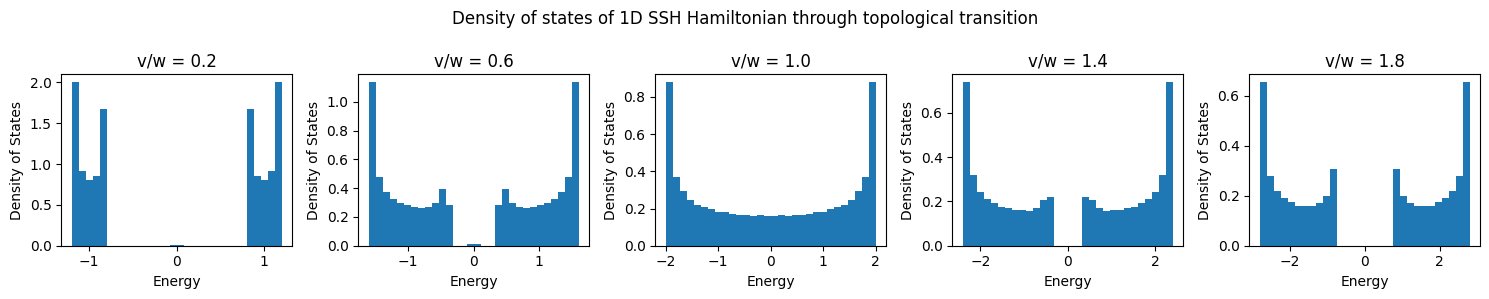

In [4]:
L = 1000
v_values = np.linspace(0.2,1.8,5)
fig, axs = plt.subplots(1,len(v_values), figsize=(15,3))
for i, v in enumerate(v_values):
    SSHmodeltest = SLM.OneDimensionalSSHBlockBasis(L,disorder,rho,kappa,v,w)
    eigvals, eigvecs = SSHmodeltest.find_eigenvalues(SSHmodeltest.H,L,False)
    axs[i].hist(eigvals, bins=30, density=True)
    axs[i].set_title(f'v/w = {v:.1f}')
    axs[i].set_xlabel('Energy')
    axs[i].set_ylabel('Density of States')
fig.suptitle('Density of states of 1D SSH Hamiltonian through topological transition')
plt.tight_layout()
plt.show()

The spectral localiser is then defined as [kappa \* (X-x0\*I) - i\*(H-E0*I)] @ gamma
where gamma is some chiral symmetry matrix that anticommutes with H but commutes with X
In this case we take gamma to be [-I 0] 
                                 [ 0 I]
and also in this case we take E0=0 and x0=0 because we are looking at the bulk at 0 energy


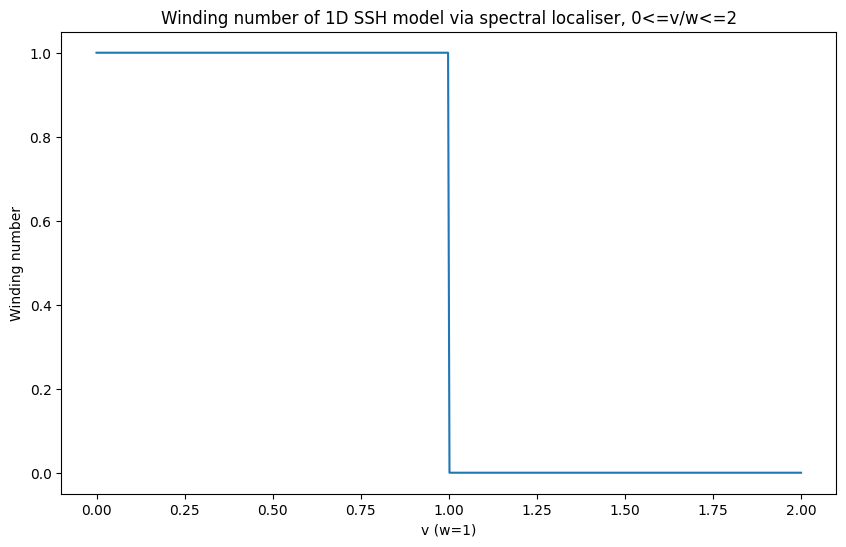

In [9]:
L = 100
v_values = np.linspace(0,2,500)
fig, axs = plt.subplots(figsize=(10,6))
winding_numbers = [0] * len(v_values)
for i, v in enumerate(v_values):
    SSHmodeltest = SLM.OneDimensionalSSHBlockBasis(L,disorder,rho,kappa,v,w)
    winding_numbers[i] = SSHmodeltest.calculate_winding_number()

plt.title('Winding number of 1D SSH model via spectral localiser, 0<=v/w<=2')
plt.xlabel('v (w=1)')
plt.ylabel('Winding number')
plt.plot(v_values, winding_numbers)


We can also then see what this looks like locally as we progress along the chain, fixing v to be within the topologically insulating regime

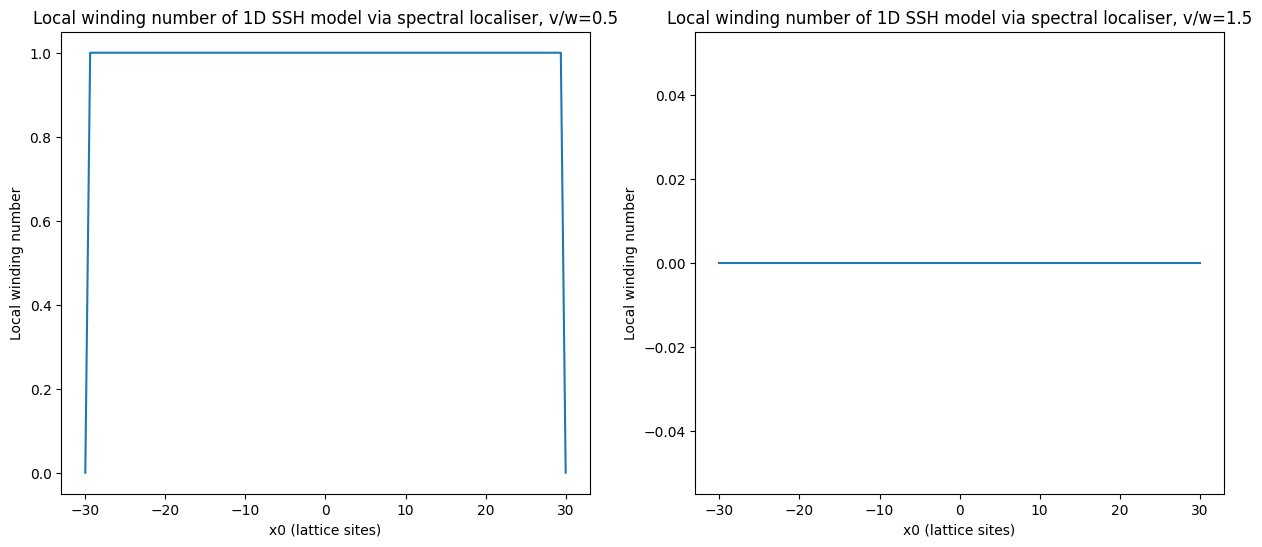

In [8]:
L = 100
rho = 30
kappa = 0.1
disorder = 0
v = 0.5
w = 1
x_values = np.linspace(-rho,rho,L)
winding_numbers = [0] * len(x_values)
for i, x0 in enumerate(x_values):
    SSHmodeltest = SLM.OneDimensionalSSHBlockBasis(L,disorder,rho,kappa,v,w)
    winding_numbers[i] = SSHmodeltest.calculate_winding_number(x0,0)

fig, axs = plt.subplots(1,2,figsize=(15,6))

axs[0].set_title('Local winding number of 1D SSH model via spectral localiser, v/w=0.5')
axs[0].set_xlabel('x0 (lattice sites)')
axs[0].set_ylabel('Local winding number')
axs[0].plot(x_values, winding_numbers)

winding_numbers = [0] * len(x_values)
v = 1.5
for i, x0 in enumerate(x_values):
    SSHmodeltest = SLM.OneDimensionalSSHBlockBasis(L,disorder,rho,kappa,v,w)
    winding_numbers[i] = SSHmodeltest.calculate_winding_number(x0,0)

axs[1].set_title('Local winding number of 1D SSH model via spectral localiser, v/w=1.5')
axs[1].set_xlabel('x0 (lattice sites)')
axs[1].set_ylabel('Local winding number')
axs[1].plot(x_values, winding_numbers)
plt.show()
    

Then if I add in disorder, it still stays to an integer value (although it still looks strange so I'm not 100% happy with it)

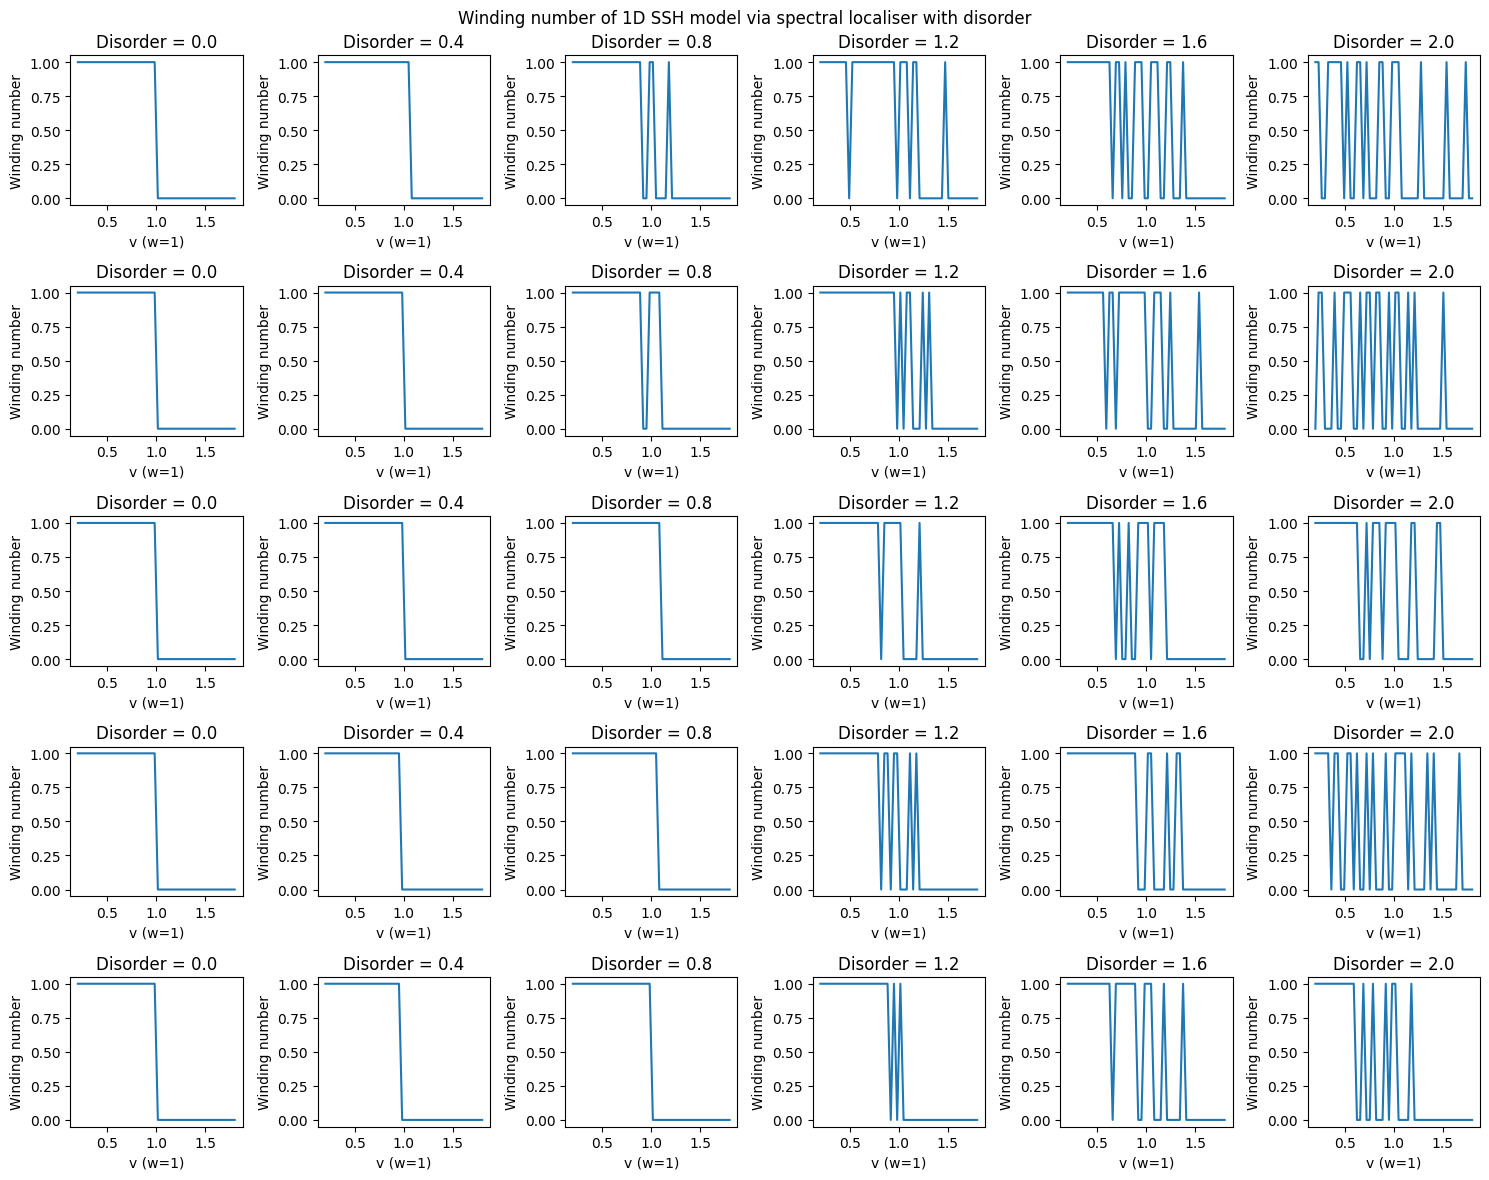

In [17]:

w = 1
np.random.seed(5)
L_values = [100,200,400,600,800]
disorder_values = np.linspace(0,2,6)
v_values = np.linspace(0.2,1.8,50)
fig, axs = plt.subplots(len(L_values),len(disorder_values), figsize=(15,12))
winding_numbers = [0] * len(disorder_values)
for k, L in enumerate(L_values):
    for i, disorder in enumerate(disorder_values):
        winding_numbers = [0] * len(v_values)
        for j, v in enumerate(v_values):
            SSHmodeltest = SLM.OneDimensionalSSHBlockBasis(L,disorder,rho,kappa,v,w)
            winding_numbers[j] = SSHmodeltest.calculate_winding_number()
        axs[k,i].set_title(f'Disorder = {disorder:.1f}')
        axs[k,i].set_xlabel('v (w=1)')
        axs[k,i].set_ylabel('Winding number')
        axs[k,i].plot(v_values, winding_numbers)
fig.suptitle('Winding number of 1D SSH model via spectral localiser with disorder')
plt.tight_layout()
plt.show()


I could be wrong, it could just be chance, but it looks like at larget system size it calms down a bit?

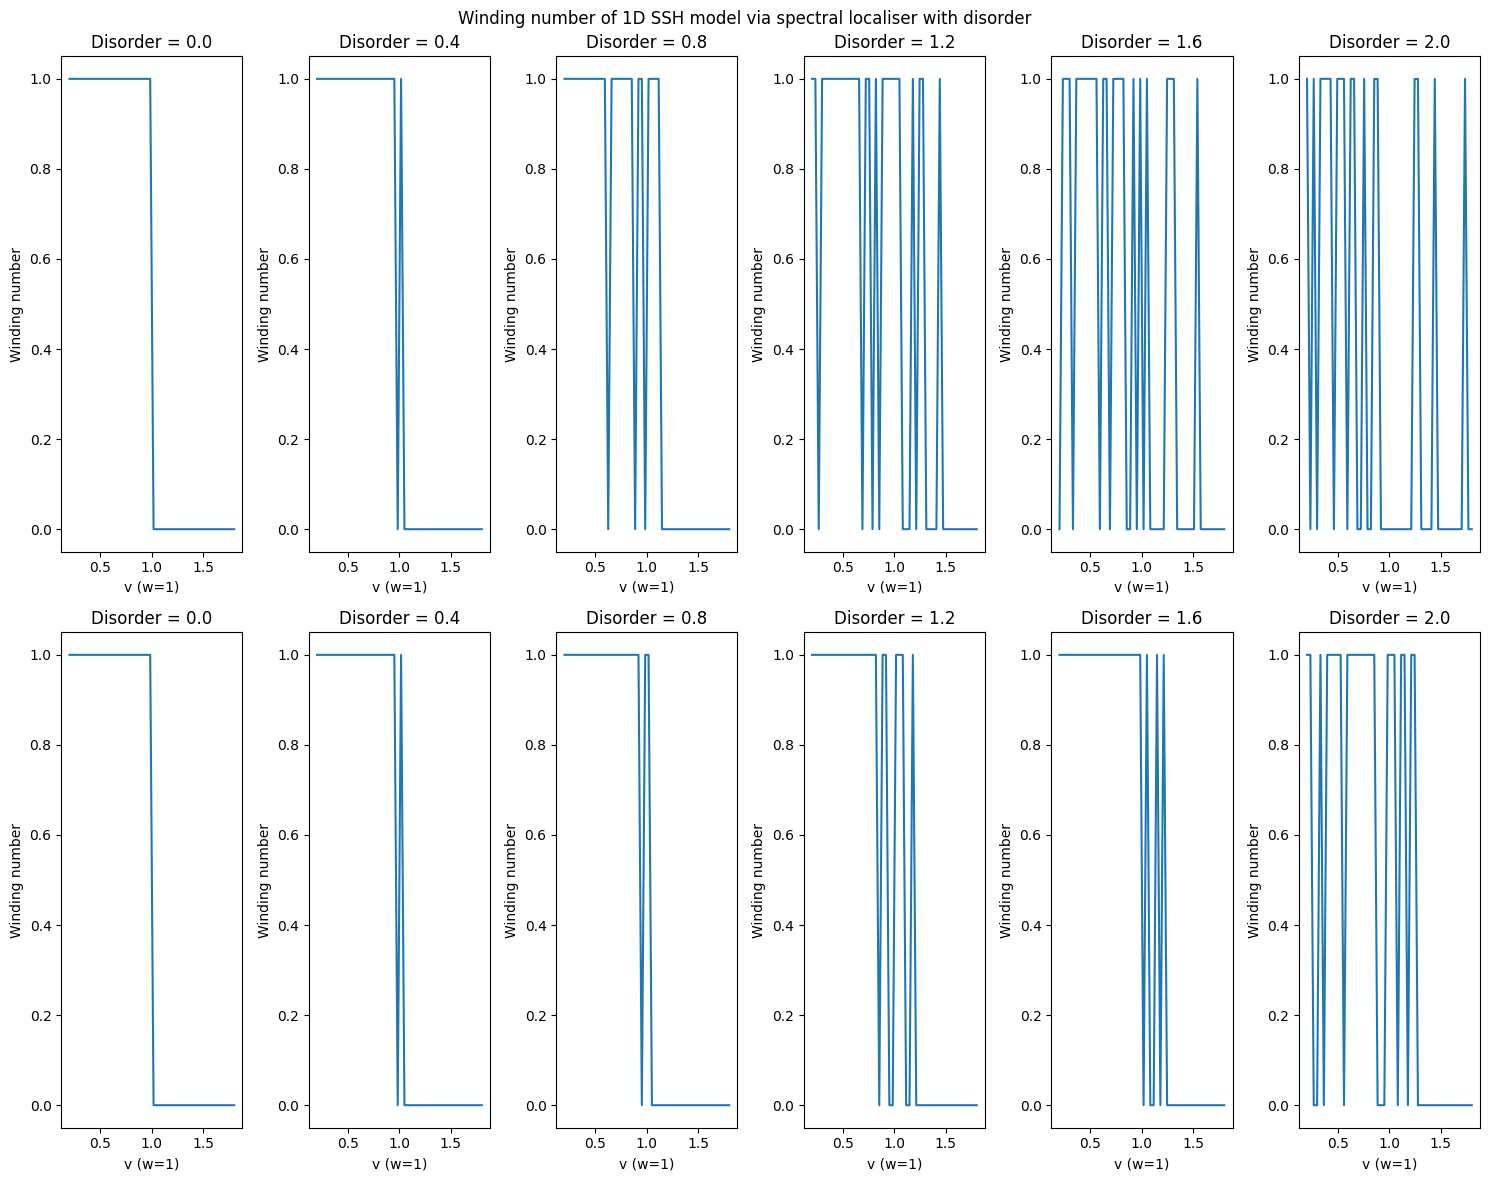

In [19]:

w = 1
np.random.seed(5)
L_values = [50,1500]
disorder_values = np.linspace(0,2,6)
v_values = np.linspace(0.2,1.8,50)
fig, axs = plt.subplots(len(L_values),len(disorder_values), figsize=(15,12))
winding_numbers = [0] * len(disorder_values)
for k, L in enumerate(L_values):
    for i, disorder in enumerate(disorder_values):
        winding_numbers = [0] * len(v_values)
        for j, v in enumerate(v_values):
            SSHmodeltest = SLM.OneDimensionalSSHBlockBasis(L,disorder,rho,kappa,v,w)
            winding_numbers[j] = SSHmodeltest.calculate_winding_number()
        axs[k,i].set_title(f'Disorder = {disorder:.1f}')
        axs[k,i].set_xlabel('v (w=1)')
        axs[k,i].set_ylabel('Winding number')
        axs[k,i].plot(v_values, winding_numbers)
fig.suptitle('Winding number of 1D SSH model via spectral localiser with disorder')
plt.tight_layout()
plt.show()


Okay this might actually be accurate, the top row of graphs is for L=50, the bottom row is for L=1500